<a href="https://colab.research.google.com/github/swathivenkatesan87/24ADI003-24BAD122-ML/blob/main/Ex_3_24BAD122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCENARIO 1 – MULTILINEAR REGRESSION
Problem Statement
Predict student academic performance based on academic, behavioral, and lifestyle factors.
Dataset (Kaggle – Public)
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
Target Variable
• Final Exam Score (Average of Math, Reading, Writing)
Input Features
• Study hours per day
• Attendance percentage
• Parental education level (encoded)
• Test preparation course (encoded)
• Sleep hours
IN-LAB TASKS (Multilinear Regression)
1. Import required Python libraries.
2. Load the student performance dataset.
3. Perform data preprocessing and encoding of categorical features.
4. Select multiple input features and compute the target variable.
5. Handle missing values using suitable imputation.
6. Apply feature scaling.
7. Split the dataset into training and testing sets.
8. Train a Multilinear Regression model.
9. Predict student performance for test data.
10. Evaluate performance using:
• MSE
• RMSE
• R² Score
11. Analyze regression coefficients to interpret feature influence.
12. Optimize the model using:
• Feature elimination
• Ridge and Lasso regularization
Visualization
• Predicted vs Actual exam scores
• Coefficient magnitude comparison
• Residual distribution plo

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              

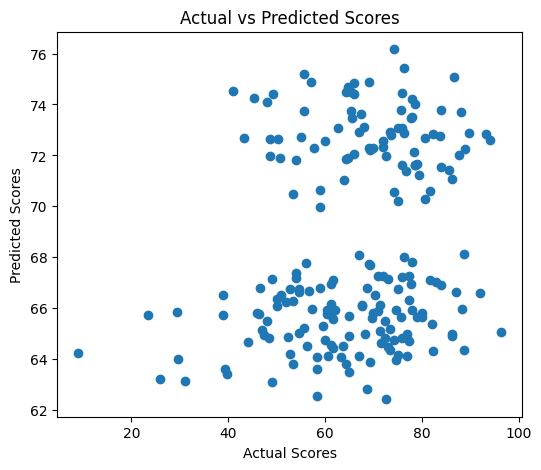

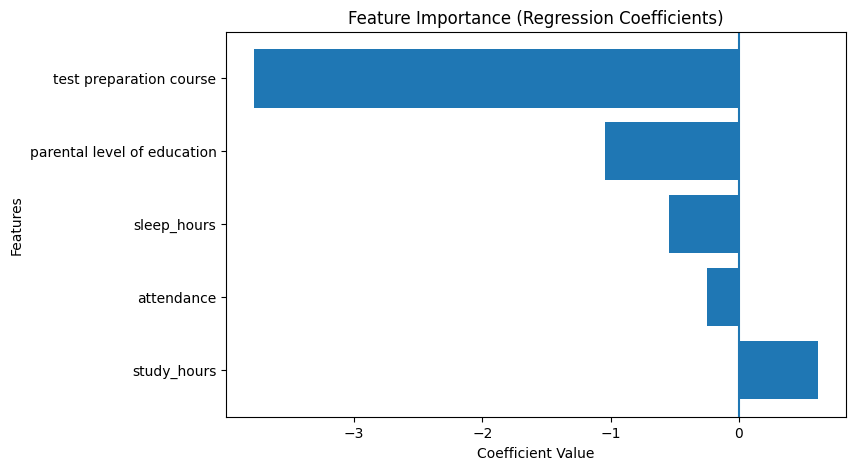

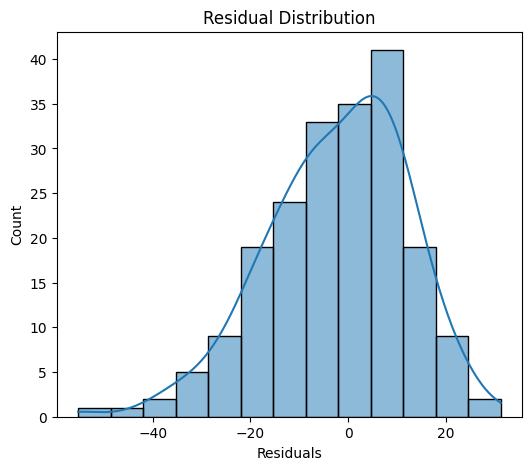

In [ ]:
# -----------------------------------------------------------
# SCENARIO 1 – MULTILINEAR REGRESSION
# Name : SWATHI
# Roll No : 24BAD122
# Problem: Predict Student Academic Performance
# -----------------------------------------------------------

# 1. Import required Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


# 2. Load dataset
# Make sure StudentsPerformance.csv is in the same folder
# ---
data = pd.read_csv("StudentsPerformance.csv")

print("First 5 rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())


# 3. Data preprocessing and encoding categorical features

le = LabelEncoder()

categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Create additional features (synthetic for lab demonstration)

np.random.seed(10)

data["study_hours"] = np.random.randint(1, 6, size=len(data))
data["attendance"] = np.random.randint(60, 100, size=len(data))
data["sleep_hours"] = np.random.randint(5, 9, size=len(data))

# 4. Compute target variable

data["final_score"] = (
    data["math score"] +
    data["reading score"] +
    data["writing score"]
) / 3
# 5. Handle missing values

data.fillna(data.mean(numeric_only=True), inplace=True)


# 6. Select features and target

X = data[[
    "study_hours",
    "attendance",
    "sleep_hours",
    "parental level of education",
    "test preparation course"
]]

y = data["final_score"]



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 7. Split dataset

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 8. Train Multilinear Regression model


model = LinearRegression()
model.fit(X_train, y_train)



y_pred = model.predict(X_test)


# 10. Evaluation Metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MSE :", mse)
print("RMSE :", rmse)
print("R2 Score :", r2)


# 11. Regression Coefficients


coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nRegression Coefficients:")
print(coeff_df)


# 12. Optimization – Ridge & Lasso


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("\nRidge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))


# 1. Predicted vs Actual Plot
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()


# 2. Improved Coefficient Comparison (Horizontal Bar Graph)

plt.figure(figsize=(8,5))
plt.barh(coeff_df["Feature"], coeff_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance (Regression Coefficients)")
plt.axvline(x=0)
plt.show()


# 3. Residual Distribution Plot

residuals = y_test - y_pred

plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()



 This code performs a multilinear regression analysis to predict student academic performance. It covers a full machine learning workflow from data loading and preprocessing to model training, evaluation, and visualization. Let me break it down for you:

Library Imports: It starts by importing necessary libraries like numpy for numerical operations, pandas for data manipulation, matplotlib and seaborn for plotting, and various modules from sklearn for model selection, preprocessing, linear models (Linear, Ridge, Lasso), and evaluation metrics.

Data Loading and Initial Inspection: The code loads the StudentsPerformance.csv dataset into a pandas DataFrame. It then prints the first 5 rows and a summary of the dataset's information (data.info()) to understand its structure and data types.

Data Preprocessing and Feature Engineering: This section prepares the data for modeling:

LabelEncoder is used to convert categorical columns (like 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') into numerical representations.
Synthetic features such as 'study_hours', 'attendance', and 'sleep_hours' are generated randomly and added to the dataset for demonstration purposes, making the problem more illustrative of a multilinear regression scenario.
Target Variable Calculation: A new column, 'final_score', is created as the average of 'math score', 'reading score', and 'writing score'. This 'final_score' will be the target variable (y) for the regression model.

Handling Missing Values: Any remaining missing values in the dataset are filled with the mean of their respective columns, ensuring the dataset is complete for modeling.

Feature Selection and Scaling: Specific columns (the synthetic features and the encoded categorical features) are selected as input features (X). The target variable (y) is set to 'final_score'. StandardScaler is then applied to X to normalize the features, which is crucial for many machine learning algorithms, especially those that rely on distance calculations or gradient descent.

Dataset Splitting: The preprocessed data is split into training (80%) and testing (20%) sets using train_test_split. This allows the model to be trained on one subset of the data and evaluated on unseen data.

Multilinear Regression Model Training: A LinearRegression model is initialized and trained (fit) on the scaled training features (X_train) and the corresponding training target values (y_train).

Prediction: The trained model makes predictions (predict) on the scaled test features (X_test).

Evaluation Metrics: The model's performance is evaluated using common regression metrics:

Mean Squared Error (MSE): The average of the squared differences between predicted and actual values.
Root Mean Squared Error (RMSE): The square root of the MSE, providing an error measure in the same units as the target variable.
R² Score: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
Regression Coefficients: The coefficients of the trained linear regression model are extracted and displayed. These coefficients indicate the strength and direction of the relationship between each input feature and the target variable.

Optimization with Regularization (Ridge & Lasso): To potentially improve the model and prevent overfitting, Ridge and Lasso regression models are also trained and evaluated. These are regularization techniques that add penalties to the regression coefficients:

Ridge Regression: Adds an L2 penalty (sum of squared coefficients), which helps in shrinking coefficients and reducing multicollinearity.
Lasso Regression: Adds an L1 penalty (sum of absolute coefficients), which can shrink some coefficients to zero, effectively performing feature selection. The R² scores for both Ridge and Lasso models are printed for comparison.
Visualizations: Finally, the code generates three plots to help understand the model's performance and interpret its results:

Predicted vs. Actual Scores Plot: A scatter plot comparing the model's predictions against the true test scores. A good model would show points clustered along a diagonal line.
Feature Importance (Regression Coefficients) Plot: A horizontal bar chart visualizing the magnitude of the coefficients for each feature, indicating their relative importance in the model.
Residual Distribution Plot: A histogram (with a Kernel Density Estimate) of the residuals (the differences between actual and predicted values). Ideally, residuals should be normally distributed around zero, indicating that the model's errors are random and not systematically biased